<a href="https://colab.research.google.com/github/DurgaBhavana/5731Submissions/blob/master/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis, and regression analysis.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you understand topic modeling better as well as how to visualize topic modeling results, aims to collect the human meanings of documents. Based on the yelp review data (only the review text will be used for this question), which can be download from Dropbox: https://www.dropbox.com/s/59hsrk56sfwh9u2/Assignment%20four%20data%20Yelp%20%28question%201%20and%202%29.zip?dl=0, **select two models** and write a python program to **identify the top 20 topics (with 15 words for each topic) in the dataset**. Before answering this question, please review the materials in lesson 8, as well as the introduction of these models by the links provided.

(1)   Labeled LDA (LLDA): https://github.com/JoeZJH/Labeled-LDA-Python

(2)   Biterm Topic Model (BTM): https://github.com/markoarnauto/biterm

(3)   HMM-LDA: https://github.com/dongwookim-ml/python-topic-model

(4)   SupervisedLDA: https://github.com/dongwookim-ml/python-topic-model/tree/master/notebook

(5)   Relational Topic Model: https://github.com/dongwookim-ml/python-topic-model/tree/master/notebook

(6)   LDA2VEC: https://github.com/cemoody/lda2vec

(7)   BERTopic: https://github.com/MaartenGr/BERTopic

(8)   LDA+BERT Topic Modeling: https://www.kaggle.com/dskswu/topic-modeling-bert-lda

(9)   Clustering for Topic models: (paper: https://arxiv.org/abs/2004.14914), (code: https://github.com/adalmia96/Cluster-Analysis)


**The following information should be reported:**

(1) Top 20 clusters for topic modeling.

(2) Summarize and describe the topic for each cluster. 

(3) Visualize the topic modeling reasults by using pyLDAVis: https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/#14.-pyLDAVis


In [29]:
from zipfile import ZipFile
import json
import pandas as pd
import os

In [46]:
# EXTRACTING THE ZIP FOLDER
file_name = '/content/Assignment four data Yelp (question 1 and 2).zip'
with ZipFile(file_name, 'r') as zip:
    zip.extractall()
    print('Extracted the zip now')

Extracted the zip now


In [47]:
reviews = list()
ratings = list()
files = os.listdir('/content/Assignment four data Yelp (question 1 and 2)')

In [48]:
# LOADING AND APPENDING ALL THE JSON FILES TO A LIST
i=0
for file in files:
  with open('/content/Assignment four data Yelp (question 1 and 2)/'+file, 'r') as readfile:
    i +=1
    json_data = json.load(readfile)
    for data in json_data:
      reviews.append(data['text'])
      ratings.append(data['stars'])
    if(i==30):
      break

In [49]:
# CONVERTING TO DATAFRAME
json_df = pd.DataFrame(reviews,columns = ["Reviews"])
json_df["Ratings"] = ratings

In [50]:
json_df.shape

(3000, 2)

In [51]:
json_df.head(5)

,Reviews,Ratings
0,Exceptional customer service by your service d...,5.0
1,I decided to check out downtown Pittsburgh on ...,3.0
2,Just got back home form here and couldn't wait...,5.0
3,Came here for lunch with a friend last Saturda...,5.0
4,Good food but terrible service. have been her...,2.0


In [59]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import re
from textblob import TextBlob
from nltk.stem import PorterStemmer
from textblob import Word
nltk.download('wordnet')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
# PRE PROCESSING

# Special characters removal
json_df['After noise removal'] = json_df['Reviews'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', charctr) for charctr in x ))

# Punctuation removal
json_df['Punctuation removal'] = json_df['After noise removal'].str.replace('[^\w\s]','')

# Remove numbers
json_df['Remove numbers'] = json_df['Punctuation removal'].str.replace('\d+', '')

In [ ]:
# Stopwords removal
stop_word = stopwords.words('english')
json_df['Stopwords removal'] = json_df['Remove numbers'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_word))

# Lower Casing
json_df['Lower casing'] = json_df['Stopwords removal'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Tokenization
json_df['Tokenization'] = json_df['Lower casing'].apply(lambda x: TextBlob(x).words)

# Stemming
st = PorterStemmer()
json_df['Stemming'] = json_df['Tokenization'].apply(lambda x: " ".join([st.stem(word) for word in x]))

# Lemmatization
json_df['Lemmatization'] = json_df['Stemming'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [ ]:
json_df.head(10)

,Reviews,Ratings,After noise removal,Punctuation removal,Remove numbers,Stopwords removal,Lower casing,Tokenization,Stemming,Lemmatization
0,Yumalisciousness! I'm not even a big sandwich ...,5.0,Yumalisciousness I m not even a big sandwich ...,Yumalisciousness I m not even a big sandwich ...,Yumalisciousness I m not even a big sandwich ...,Yumalisciousness I even big sandwich person Ik...,yumalisciousness i even big sandwich person ik...,"[yumalisciousness, i, even, big, sandwich, per...",yumalisci i even big sandwich person ike defin...,yumalisci i even big sandwich person ike defin...
1,The place has the look and feel of a dingy yo...,2.0,The place has the look and feel of a dingy yo...,The place has the look and feel of a dingy yo...,The place has the look and feel of a dingy yo...,The place look feel dingy yoga studio due plai...,the place look feel dingy yoga studio due plai...,"[the, place, look, feel, dingy, yoga, studio, ...",the place look feel dingi yoga studio due plai...,the place look feel dingi yoga studio due plai...
2,Horrible customer service.....have been withou...,1.0,Horrible customer service have been withou...,Horrible customer service have been withou...,Horrible customer service have been withou...,Horrible customer service without Internet tel...,horrible customer service without internet tel...,"[horrible, customer, service, without, interne...",horribl custom servic without internet telepho...,horribl custom servic without internet telepho...
3,Such a cute little cafe! close to my house I l...,4.0,Such a cute little cafe close to my house I l...,Such a cute little cafe close to my house I l...,Such a cute little cafe close to my house I l...,Such cute little cafe close house I loved deco...,such cute little cafe close house i loved deco...,"[such, cute, little, cafe, close, house, i, lo...",such cute littl cafe close hous i love decor a...,such cute littl cafe close hous i love decor a...
4,Been going here for years. I've never eaten an...,4.0,Been going here for years I ve never eaten an...,Been going here for years I ve never eaten an...,Been going here for years I ve never eaten an...,Been going years I never eaten anything I like...,been going years i never eaten anything i like...,"[been, going, years, i, never, eaten, anything...",been go year i never eaten anyth i like new ow...,been go year i never eaten anyth i like new ow...
5,If you're looking for a vegetarian place that ...,3.0,If you re looking for a vegetarian place that ...,If you re looking for a vegetarian place that ...,If you re looking for a vegetarian place that ...,If looking vegetarian place makes say Wow I be...,if looking vegetarian place makes say wow i be...,"[if, looking, vegetarian, place, makes, say, w...",if look vegetarian place make say wow i believ...,if look vegetarian place make say wow i believ...
6,So sad! This used to be one of my fave places....,1.0,So sad This used to be one of my fave places ...,So sad This used to be one of my fave places ...,So sad This used to be one of my fave places ...,So sad This used one fave places Over last yea...,so sad this used one fave places over last yea...,"[so, sad, this, used, one, fave, places, over,...",so sad thi use one fave place over last year i...,so sad thi use one fave place over last year i...
7,Love the large layout and the max speed is ver...,4.0,Love the large layout and the max speed is ver...,Love the large layout and the max speed is ver...,Love the large layout and the max speed is ver...,Love large layout max speed enjoyable They arc...,love large layout max speed enjoyable they arc...,"[love, large, layout, max, speed, enjoyable, t...",love larg layout max speed enjoy they arcad ga...,love larg layout max speed enjoy they arcad ga...
8,1. Parking: parking is across the street from ...,3.0,1 Parking parking is across the street from ...,1 Parking parking is across the street from ...,Parking parking is across the street from h...,Parking parking across str

### Model 1 - BiTerm Topic Modeling

In [ ]:
pip install biterm

     |████████████████████████████████| 81kB 3.5MB/s 
  Created wheel for biterm: filename=biterm-0.1.5-cp36-cp36m-linux_x86_64.whl size=195421 sha256=05aab37ce806cdef65e1e2d408502e18622b3518aec13590632de3131acfa3ff
  Stored in directory: /root/.cache/pip/wheels/86/04/10/231fb1d39d86ab58c2683fd3d4fe8415a5bc284ba8a20fd638
Successfully built biterm


In [ ]:
import numpy as np

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(stop_words='english')
X = vec.fit_transform(json_df['Reviews'].head(500).values).toarray()

In [ ]:
from biterm.utility import vec_to_biterms
vocab = np.array(vec.get_feature_names())
biterms = vec_to_biterms(X)

In [ ]:
from biterm.btm import oBTM
btm = oBTM(num_topics=20, V=vocab)
topics = btm.fit_transform(biterms, iterations=10)


100%|██████████| 10/10 [41:53<00:00, 251.30s/it]


In [ ]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 6.0MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=84401d7d5b0ad3810ef205a53a4cf094b694a3e38e876e9c251d4907600a7308
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [ ]:
import numpy as np
import pyLDAvis
from biterm.btm import oBTM 
from sklearn.feature_extraction.text import CountVectorizer
from biterm.utility import vec_to_biterms, topic_summuary # helper functions

if __name__ == "__main__":
    texts = json_df["Lemmatization"].head(100).values
    # vectorize texts
    vec = CountVectorizer(stop_words='english')
    X = vec.fit_transform(texts).toarray()

    # get vocabulary
    vocab = np.array(vec.get_feature_names())

    # get biterms
    biterms = vec_to_biterms(X)

    # create btm
    btm = oBTM(num_topics=20, V=vocab)

    print("\n\n Train Online BTM ..")
    for i in range(0, len(biterms), 100): # prozess chunk of 200 texts
        biterms_chunk = biterms[i:i + 100]
        btm.fit(biterms_chunk, iterations=10)
    topics = btm.transform(biterms)

    print("\n\n Visualize Topics ..")
    vis = pyLDAvis.prepare(btm.phi_wz.T, topics, np.count_nonzero(X, axis=1), vocab, np.sum(X, axis=0))
    # pyLDAvis.save_html(vis, './vis/online_btm.html')  # path to output
    print(vis)

    print("\n\n Topic coherence ..")
    topic_summuary(btm.phi_wz.T, X, vocab, 10)

    # print("\n\n Texts & Topics ..")
    # for i in range(len(texts)):
    #     print("{} (topic: {})".format(texts[i], topics[i].argmax()))



 Train Online BTM ..



100%|██████████| 10/10 [04:18<00:00, 25.89s/it]




 Visualize Topics ..
PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
0      0.136729  0.115347       1        1  9.367696
4      0.123923  0.128127       2        1  8.423392
8      0.096017  0.084911       3        1  7.551605
13     0.124381  0.068550       4        1  6.991518
7      0.121284  0.106933       5        1  6.081147
16     0.057685 -0.018511       6        1  5.955514
6      0.143144  0.048399       7        1  5.704505
5      0.079611  0.041879       8        1  5.694070
12     0.083281  0.018830       9        1  5.661890
10     0.064097 -0.367454      10        1  5.386652
1     -0.474744  0.028376      11        1  4.932292
17     0.100625  0.073875      12        1  4.773647
18     0.056582 -0.382914      13        1  4.330498
11     0.001745 -0.052851      14        1  4.241870
9      0.088624  0.006368      15        1  4.170538
19     0.036013 -0.034054      16        1  3

In [ ]:
pyLDAvis.display(vis, './vis/online_btm.html')

/usr/local/lib/python3.6/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


### Summarizing the topic per cluster















### Model 2 - LDA through Gensim

In [ ]:
from pprint import pprint
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
# spacy for lemmatization
import spacy
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline
# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

/usr/local/lib/python3.6/dist-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [ ]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [ ]:
json_data = json_df.values.tolist()

In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(json_data))

print(data_words[:1])

[['not', 'even', 'big', 'sandwich', 'person', 'but', 'ike', 'definitely', 'has', 'my', 'love', 'the', 'dutch', 'crunch', 'bread', 'is', 'the', 'bomb', 'and', 'the', 'dirty', 'sauce', 'is', 'just', 'garlicky', 'goodness', 'staff', 'is', 'fun', 'and', 'friendly', 'and', 'the', 'menu', 'offers', 'one', 'of', 'kind', 'exciting', 'combinations', 'all', 'sandwiches', 'are', 'hot', 'and', 'made', 'to', 'order', 'and', 'customized', 'to', 'your', 'level', 'of', 'awesomeness', 'this', 'place', 'is', 'always', 'packed', 'at', 'lunch', 'time', 'so', 'plan', 'accordingly', 'not', 'even', 'big', 'sandwich', 'person', 'but', 'ike', 'definitely', 'has', 'my', 'love', 'the', 'dutch', 'crunch', 'bread', 'is', 'the', 'bomb', 'and', 'the', 'dirty', 'sauce', 'is', 'just', 'garlicky', 'goodness', 'staff', 'is', 'fun', 'and', 'friendly', 'and', 'the', 'menu', 'offers', 'one', 'of', 'kind', 'exciting', 'combinations', 'all', 'sandwiches', 'are', 'hot', 'and', 'made', 'to', 'order', 'and', 'customized', 'to',

In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

#Trigram
print(trigram_mod[bigram_mod[data_words[0]]])

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['not', 'even', 'big', 'sandwich', 'person', 'but', 'ike', 'definitely', 'has', 'my', 'love', 'the', 'dutch_crunch_bread', 'is', 'the', 'bomb', 'and', 'the', 'dirty', 'sauce', 'is', 'just', 'garlicky_goodness', 'staff', 'is', 'fun', 'and', 'friendly', 'and', 'the', 'menu', 'offers', 'one', 'of', 'kind', 'exciting_combinations', 'all', 'sandwiches', 'are', 'hot', 'and', 'made', 'to', 'order', 'and', 'customized', 'to', 'your', 'level', 'of', 'awesomeness', 'this', 'place', 'is', 'always', 'packed', 'at', 'lunch', 'time', 'so', 'plan_accordingly', 'not', 'even', 'big', 'sandwich', 'person', 'but', 'ike', 'definitely', 'has', 'my', 'love', 'the', 'dutch_crunch_bread', 'is', 'the', 'bomb', 'and', 'the', 'dirty', 'sauce', 'is', 'just', 'garlicky_goodness', 'staff', 'is', 'fun', 'and', 'friendly', 'and', 'the', 'menu', 'offers', 'one', 'of', 'kind', 'exciting_combinations', 'all', 'sandwiches', 'are', 'hot', 'and', 'made', 'to', 'order', 'and', 'customized', 'to', 'your', 'level', 'of', 'awe

In [ ]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['even', 'big', 'person', 'ike', 'definitely', 'love', 'bread', 'bomb', 'dirty', 'sauce', 'garlicky_goodness', 'staff', 'fun', 'friendly', 'menu', 'offer', 'kind', 'exciting_combination', 'sandwich', 'hot', 'make', 'order', 'customize', 'level', 'awesomeness', 'place', 'always', 'pack', 'lunch', 'time', 'plan', 'accordingly', 'even', 'big', 'sandwich', 'person', 'ike', 'definitely', 'love', 'bread', 'bomb', 'dirty', 'sauce', 'garlicky_goodness', 'staff', 'fun', 'friendly', 'menu', 'offer', 'kind', 'exciting_combination', 'sandwich', 'hot', 'make', 'order', 'customize', 'level', 'awesomeness', 'place', 'always', 'pack', 'lunch', 'time', 'plan', 'accordingly', 'even', 'big', 'sandwich', 'person', 'ike', 'definitely', 'love', 'bread', 'bomb', 'dirty', 'sauce', 'garlicky_goodness', 'staff', 'fun', 'friendly', 'menu', 'offer', 'kind', 'exciting_combination', 'sandwich', 'hot', 'make', 'order', 'customize', 'level', 'awesomeness', 'place', 'always', 'pack', 'lunch', 'time', 'plan', 'accordi

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 7), (1, 2), (2, 7), (3, 2), (4, 7), (5, 9), (6, 9), (7, 9), (8, 2), (9, 7), (10, 2), (11, 7), (12, 7), (13, 9), (14, 2), (15, 7), (16, 7), (17, 7), (18, 7), (19, 9), (20, 9), (21, 9), (22, 9), (23, 9), (24, 9), (25, 9), (26, 9), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 13), (34, 2), (35, 7), (36, 7), (37, 2), (38, 9), (39, 1)]]


In [ ]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('accordingly', 7),
  ('alway', 2),
  ('always', 7),
  ('awesom', 2),
  ('awesomeness', 7),
  ('big', 9),
  ('bomb', 9),
  ('bread', 9),
  ('custom', 2),
  ('customize', 7),
  ('definit', 2),
  ('definitely', 7),
  ('dirty', 7),
  ('even', 9),
  ('excit', 2),
  ('exciting_combination', 7),
  ('friendly', 7),
  ('fun', 7),
  ('garlicky_goodness', 7),
  ('hot', 9),
  ('ike', 9),
  ('kind', 9),
  ('level', 9),
  ('love', 9),
  ('lunch', 9),
  ('make', 9),
  ('menu', 9),
  ('offer', 9),
  ('order', 9),
  ('pack', 9),
  ('person', 9),
  ('place', 9),
  ('plan', 9),
  ('sandwich', 13),
  ('sauc', 2),
  ('sauce', 7),
  ('staff', 7),
  ('thi', 2),
  ('time', 9),
  ('wordlist', 1)]]

In [ ]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
# Print the Keyword in the 20 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.075*"order" + 0.065*"come" + 0.038*"friend" + 0.036*"table" + '
  '0.033*"take" + 0.033*"go" + 0.030*"back" + 0.029*"food" + 0.026*"server" + '
  '0.025*"get"'),
 (1,
  '0.085*"room" + 0.048*"old" + 0.046*"stay" + 0.037*"hotel" + 0.028*"kid" + '
  '0.022*"different" + 0.018*"would" + 0.014*"place" + 0.014*"floor" + '
  '0.014*"check"'),
 (2,
  '0.055*"give" + 0.045*"make" + 0.043*"say" + 0.031*"would" + 0.018*"call" + '
  '0.018*"get" + 0.018*"money" + 0.018*"almost" + 0.015*"talk" + 0.014*"fix"'),
 (3,
  '0.063*"night" + 0.031*"get" + 0.029*"late" + 0.026*"wife" + 0.026*"dog" + '
  '0.016*"fact" + 0.015*"decent" + 0.015*"play" + 0.015*"total" + '
  '0.013*"leave"'),
 (4,
  '0.069*"love" + 0.054*"staff" + 0.049*"make" + 0.045*"always" + '
  '0.043*"great" + 0.032*"friendly" + 0.025*"place" + 0.024*"clean" + '
  '0.022*"amazing" + 0.018*"owner"'),
 (5,
  '0.062*"day" + 0.029*"work" + 0.023*"must" + 0.021*"see" + 0.015*"provide" + '
  '0.015*"meet" + 0.014*"light" + 0.014*"new"

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.844708117272013

Coherence Score:  0.533089203468305


In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
17    -0.180234 -0.112060       1        1  8.777186
4     -0.110487  0.052821       2        1  6.916191
0      0.058046 -0.217804       3        1  6.810085
7     -0.230097 -0.111352       4        1  6.502795
19    -0.204766 -0.105000       5        1  5.985126
10     0.220929 -0.016608       6        1  5.922024
2      0.085391 -0.092315       7        1  5.322755
8     -0.153091  0.051624       8        1  5.299038
9     -0.174461  0.036890       9        1  5.066800
6      0.107189  0.027255      10        1  4.990296
12     0.108689 -0.142163      11        1  4.800446
14     0.186943 -0.061141      12        1  4.253884
18     0.108446 -0.085493      13        1  4.016720
11     0.053057  0.133787      14        1  3.885500
15    -0.038733  0.230908      15        1  3.855571
16     0.106802 -0.031372      16        1  3.841721
5      0.084783  0.241731      17        1  3.712943
1      0.000381  0.102516      18        1  3.500761
3      0.075123  0.028511      19        1  3.372131
13    -0.103910  0.069264      20        1  3.168027, topic_info=         Term          Freq         Total Category  logprob  loglift
175      food  13414.000000  13414.000000  Default  30.0000  30.0000
133     great  10961.000000  10961.000000  Default  29.0000  29.0000
28      order   9042.000000   9042.000000  Default  28.0000  28.0000
132      good  15195.000000  15195.000000  Default  27.0000  27.0000
125      come  10506.000000  10506.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
273      much    353.949262   3700.398953  Topic20  -4.5300   1.1050
1298       do    302.924202   1831.191954  Topic20  -4.6857   1.6528
601   amazing    298.987989   2737.047741  Topic20  -4.6988   1.2378
25       make    309.319638   7872.863780  Topic20  -4.6648   0.2153
125      come    290.208461  10506.324459  Topic20  -4.7286  -0.1371

[1119 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
194       1  0.122182  absolutely
194       2  0.719046  absolutely
194       5  0.028088  absolutely
194      11  0.126395  absolutely
194      16  0.004213  absolutely
...     ...       ...         ...
192      18  0.070399        year
192      20  0.080676        year
113       7  0.994142   yesterday
1575      6  0.996510       young
251       1  0.997165       yummy

[2044 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[18, 5, 1, 8, 20, 11, 3, 9, 10, 7, 13, 15, 19, 12, 16, 17, 6, 2, 4, 14])

### Summarizing the topics per cluster



# **Question 2: Yelp Review Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.

The data can be download from Dropbox: https://www.dropbox.com/s/59hsrk56sfwh9u2/Assignment%20four%20data%20Yelp%20%28question%201%20and%202%29.zip?dl=0 

The data was saved in json format, here is an example of the data (for this task, you only need to use the star rating and the review text fields):

{
    // string, 22 character unique review id
    "review_id": "zdSx_SD6obEhz9VrW9uAWA",

    // string, 22 character unique user id, maps to the user in user.json
    "user_id": "Ha3iJu77CxlrFm-vQRs_8g",

    // string, 22 character business id, maps to business in business.json
    "business_id": "tnhfDv5Il8EaGSXZGiuQGg",

    // integer, star rating
    "stars": 4,

    // string, date formatted YYYY-MM-DD
    "date": "2016-03-09",

    // string, the review itself
    "text": "Great place to hang out after work: the prices are decent, and the ambience is fun. It's a bit loud, but very lively. The staff is friendly, and the food is good. They have a good selection of drinks.",

    // integer, number of useful votes received
    "useful": 0,

    // integer, number of funny votes received
    "funny": 0,

    // integer, number of cool votes received
    "cool": 0
}

The sentiment of can be accessed based on the star rating, if no star information avaliable for a record, just remove that record. Detail star and sentiment level can be matched blew:

Very positive = 5 stars

Positive = 4 stars

Neutral = 3 stars

Negative = 2 stars

Very negative = 1 star

Here is code for yelp data preprocessing: https://github.com/Yelp/dataset-examples. 

Answer the following questions:

(1) Features used for sentiment classification and explain why you select these features (tf-idf, sentiment lexicon, word2vec, etc). Considering achieve the best performance as you can. 

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. 

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

In [53]:
import seaborn as sns

In [54]:
# Sentiment Classification
def sentiment_classifier(stars):
    if stars == 5:
      return 'Very Positive'
    elif stars == 4:
      return 'Positive'
    elif stars == 3:
      return 'Neutral'
    elif stars == 2:
      return 'Negative'
    elif stars == 1:
      return 'Very Negative'

Sentiment_level = json_df['Ratings'].map(sentiment_classifier)
json_df['Sentiment Level'] = Sentiment_level
json_df.head(5)

,Reviews,Ratings,Sentiment Level
0,Exceptional customer service by your service d...,5.0,Very Positive
1,I decided to check out downtown Pittsburgh on ...,3.0,Neutral
2,Just got back home form here and couldn't wait...,5.0,Very Positive
3,Came here for lunch with a friend last Saturda...,5.0,Very Positive
4,Good food but terrible service. have been her...,2.0,Negative


In [55]:
# Count the sentiment count
sentiment_count = json_df['Sentiment Level'].value_counts()
print(sentiment_count)

Very Positive    1369
Positive          680
Very Negative     385
Neutral           329
Negative          237
Name: Sentiment Level, dtype: int64


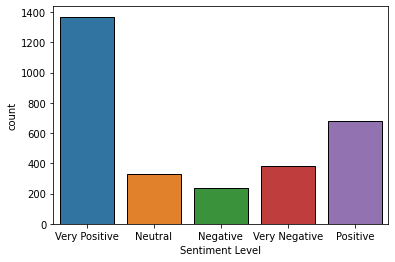

In [57]:
p = sns.countplot(data=json_df, x = 'Sentiment Level', edgecolor=(0,0,0))

In [60]:
# PRE PROCESSING

# Special characters removal
json_df['After noise removal'] = json_df['Reviews'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', charctr) for charctr in x ))

# Punctuation removal
json_df['Punctuation removal'] = json_df['After noise removal'].str.replace('[^\w\s]','')

# Remove numbers
json_df['Remove numbers'] = json_df['Punctuation removal'].str.replace('\d+', '')

In [61]:
# Stopwords removal
stop_word = stopwords.words('english')
json_df['Stopwords removal'] = json_df['Remove numbers'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_word))

# Lower Casing
json_df['Lower casing'] = json_df['Stopwords removal'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Tokenization
json_df['Tokenization'] = json_df['Lower casing'].apply(lambda x: TextBlob(x).words)

# Stemming
st = PorterStemmer()
json_df['Stemming'] = json_df['Tokenization'].apply(lambda x: " ".join([st.stem(word) for word in x]))

# Lemmatization
json_df['Lemmatization'] = json_df['Stemming'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

### TF-IDF

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn import model_selection
from sklearn import naive_bayes

In [73]:
# defining feature
tfidf_vect = TfidfVectorizer()
encoder = LabelEncoder()
x = tfidf_vect.fit_transform(json_df['Reviews'].values)

In [74]:
# Splitting data into training and testing data
xtrain, xvalid, ytrain, yvalid = model_selection.train_test_split(x, json_df['Ratings'],test_size=0.2)

In [76]:
def training_model(model_intializer):
  model = model_intializer
  model.fit(xtrain, ytrain)
  predicted = model.predict(xvalid)
  accuracy = accuracy_score(yvalid, predicted)
  print("Accuracy of Traning data: {0}".format(accuracy))
  print(classification_report(yvalid, predicted))

In [81]:
# Naive-Bayes
training_model(naive_bayes.MultinomialNB())

Accuracy of Traning data: 0.48333333333333334
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        69
         2.0       0.00      0.00      0.00        41
         3.0       0.00      0.00      0.00        64
         4.0       0.00      0.00      0.00       136
         5.0       0.48      1.00      0.65       290

    accuracy                           0.48       600
   macro avg       0.10      0.20      0.13       600
weighted avg       0.23      0.48      0.32       600



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [78]:
# SVM
training_model(svm.SVC())

Accuracy of Traning data: 0.575
              precision    recall  f1-score   support

         1.0       0.62      0.54      0.57        69
         2.0       0.00      0.00      0.00        41
         3.0       0.29      0.03      0.06        64
         4.0       0.40      0.24      0.30       136
         5.0       0.61      0.94      0.74       290

    accuracy                           0.57       600
   macro avg       0.38      0.35      0.33       600
weighted avg       0.49      0.57      0.50       600



In [ ]:
svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train, y_train)
predicted = svm_model.predict(x_test)
print("Accuracy score is {0}".format(accuracy_score(y_test, predicted)))
report = classification_report(y_test, predicted, output_dict=True)
report

# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from Dropbox: https://www.dropbox.com/s/52j9hpxppfo921o/assignment4-question3-data.zip?dl=0. Here is an axample for the implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


In [103]:
# Read training and testing data

import pandas as pd
training = pd.read_csv('/content/train.csv')
validation = pd.read_csv('/content/test.csv')

In [104]:
training.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [108]:
print(training.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [105]:
validation.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1381.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,554.294925,1046.117970,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,437.260486,442.898624,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,26.431175,0.775945,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.250000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1959.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1979.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [110]:
print(validation.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64


In [117]:
%matplotlib inline
import matplotlib.pyplot as plt

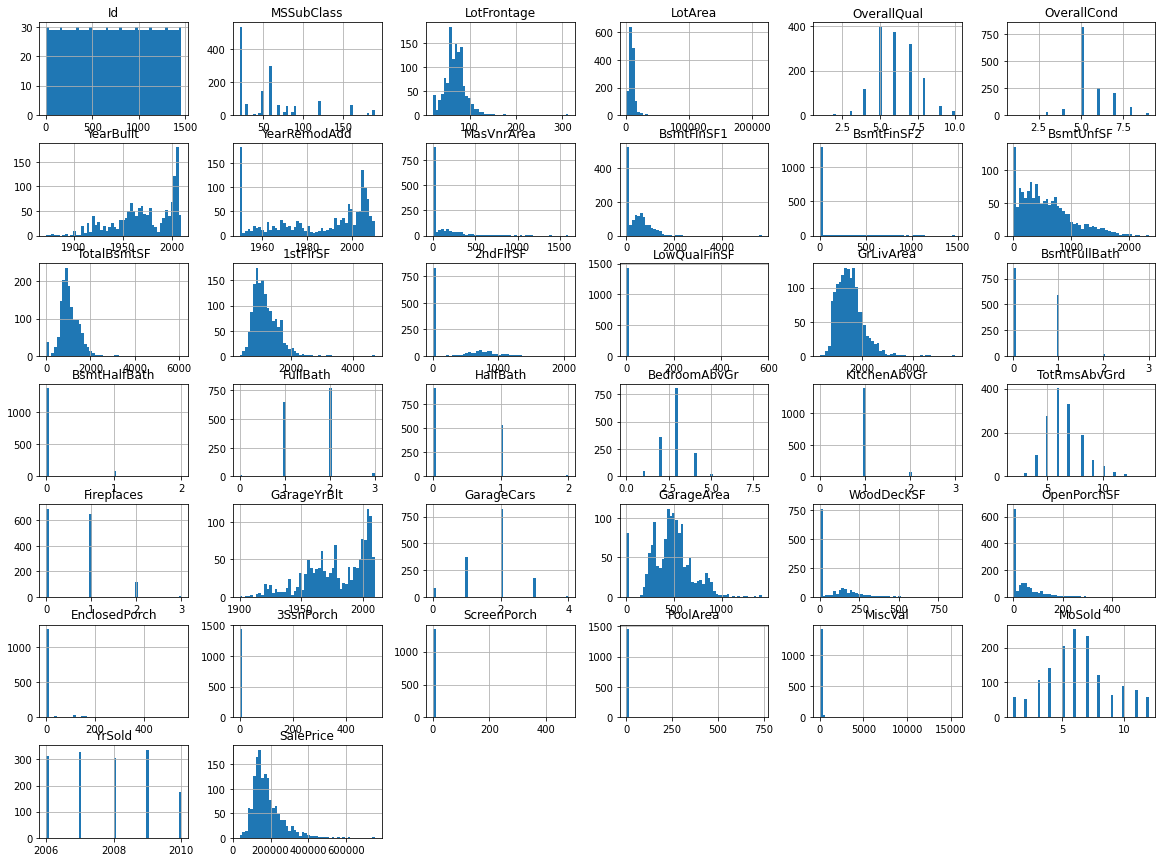

In [119]:
training.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

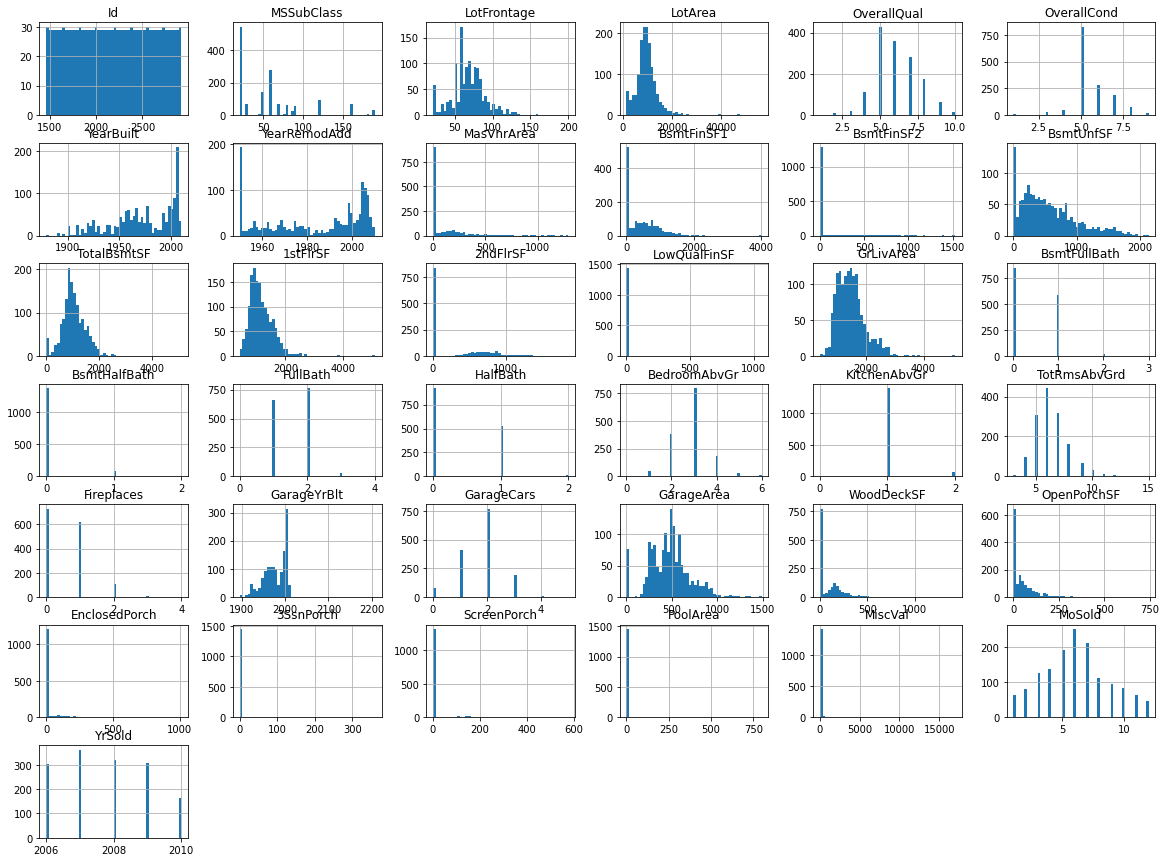

In [120]:
validation.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [126]:
corr_matrix = training.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

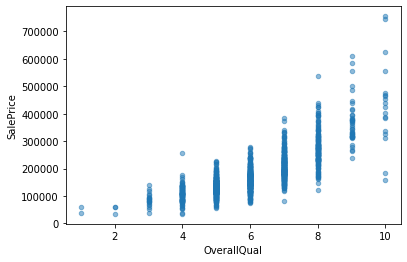

In [128]:
training.plot(kind="scatter", x="OverallQual", y="SalePrice", alpha=0.5)

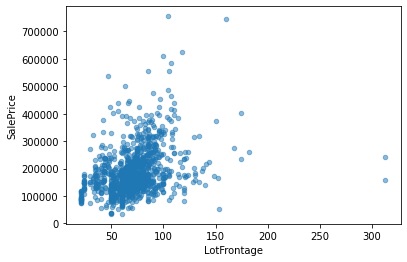

In [134]:
training.plot(kind="scatter", x="LotFrontage", y="SalePrice", alpha=0.5)

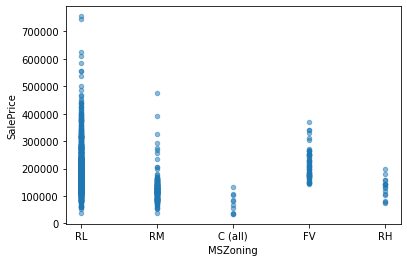

In [142]:
training.plot(kind="scatter", x="MSZoning", y="SalePrice", alpha=0.5)

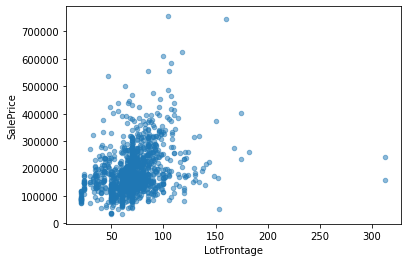

In [143]:
training.plot(kind="scatter", x="LotFrontage", y="SalePrice", alpha=0.5)

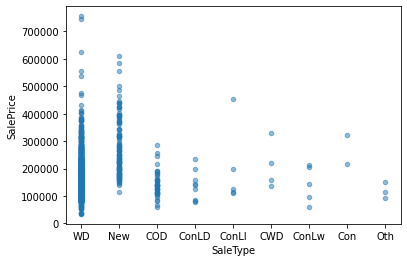

In [144]:
training.plot(kind="scatter", x="SaleType", y="SalePrice", alpha=0.5)

In [145]:
training.fillna(training.mean(), inplace = True)
validation.fillna(validation.mean(), inplace = True)

In [138]:
print(training.isnull().sum())

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64


In [146]:
print(validation.isnull().sum())

Id               0
MSSubClass       0
MSZoning         4
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         1
SaleCondition    0
Length: 80, dtype: int64


### Train and build the regression model

In [148]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

In [152]:
columns = ('GarageCond', 'LandContour', 'RoofStyle', 'RoofMatl', 'Heating', 'MiscFeature', 'SaleType', 'GarageType', 'Electrical', 'SaleCondition', 'Foundation', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'FireplaceQu', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'Utilities', 'BldgType', 'HouseStyle','PoolQC', 'BsmtQual', 'BsmtCond', 'GarageQual','BsmtExposure', 'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1','BsmtFinType2', 'Functional', 'Fence', 'GarageFinish', 'LandSlope','LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 'YrSold', 'MoSold', 'MSZoning')
encoder = LabelEncoder()

In [153]:
for i in columns:
    encoder.fit(list(training[i].values))
    training[i] = encoder.transform(list(training[i].values))
for j in columns:
    encoder.fit(list(validation[i].values))
    validation[i] = encoder.transform(list(validation[i].values))

In [161]:
x_training = training[training.columns[:80]]
y_training = training['SalePrice']

In [176]:
from sklearn.model_selection import train_test_split
test_size = 0.33
seed = 7
xtest, ytest = train_test_split(x_training, test_size=test_size,random_state=seed)

In [177]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_training, y_training)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [178]:
print('Linear Regression R squared": %.4f' % regressor.score(x_training, y_training))

Linear Regression R squared": 0.8548


### House price prediction

In [192]:
x_validation = validation[validation.columns[:80]]
validation_prediction = regressor.predict(xtest)

In [193]:
predicted_df['Predicted House Price'] = pd.DataFrame(validation_prediction)

In [194]:
predicted_df

,0,Predicted House Price
0,180322.157219,180322.157219
1,229774.096771,229774.096771
2,226910.989003,226910.989003
3,236534.155359,236534.155359
4,249098.243379,249098.243379
...,...,...
973,166192.843518,166192.843518
974,144263.264796,144263.264796
975,118854.799230,118854.799230
976,90770.871182,90770.871182
